<a href="https://colab.research.google.com/github/CiaraFarrellSETU/phd/blob/main/RGB(summer_winter).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install rasterio

In [3]:
import rasterio
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from rasterio.enums import Resampling

In [4]:
summer_path = ('/content/loughbally_ortho.tif')
winter_path = ('/content/Loughbally_Winter_RGB.tif')


In [5]:

with rasterio.open(summer_path) as src_summer:
    summer_arr = src_summer.read()  # Shape: (bands, height, width)
    summer_meta = src_summer.meta

with rasterio.open(winter_path) as src_winter:
    winter_arr = src_winter.read()
    winter_meta = src_winter.meta

print("Summer shape:", summer_arr.shape)
print("Winter shape:", winter_arr.shape)


Summer shape: (3, 40000, 40000)
Winter shape: (3, 17942, 18504)


In [6]:

if summer_arr.shape != winter_arr.shape:
    raise ValueError("Images must have same dimensions and bands!")


ValueError: Images must have same dimensions and bands!

In [10]:


 #Target size
target_height = 10000
target_width = 10000

# Resize summer image
with rasterio.open(summer_path) as src_summer:
    summer_arr = src_summer.read(
        out_shape=(src_summer.count, target_height, target_width),
        resampling=Resampling.bilinear
    )
    summer_meta = src_summer.meta
    print("Resized summer shape:", summer_arr.shape)

# Resize winter image
with rasterio.open(winter_path) as src_winter:
    winter_arr = src_winter.read(
        out_shape=(src_winter.count, target_height, target_width),
        resampling=Resampling.bilinear
    )
    winter_meta = src_winter.meta
    print("Resized winter shape:", winter_arr.shape)



Resized summer shape: (3, 10000, 10000)
Resized winter shape: (3, 10000, 10000)


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Assume summer_arr and winter_arr are already loaded and resized
# Shape: (3, 10000, 10000)

# Compute absolute difference across bands
diff = np.abs(summer_arr.astype(np.float32) - winter_arr.astype(np.float32))

# Collapse to single layer (mean difference across RGB)
diff_mean = diff.mean(axis=0)

# Normalize for visualization
diff_norm = diff_mean / diff_mean.max()

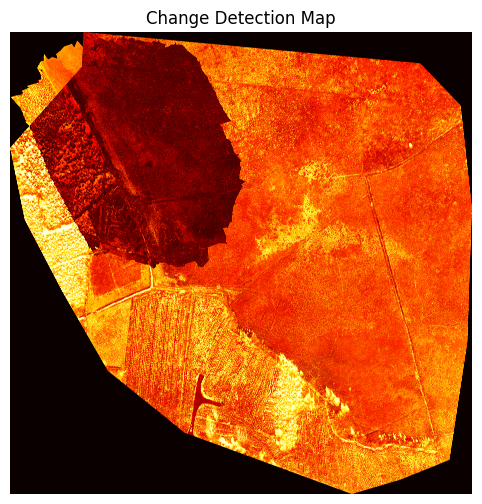

In [13]:

plt.figure(figsize=(10, 6))
plt.imshow(diff_norm, cmap='hot')
plt.title('Change Detection Map')
plt.axis('off')
plt.show()



The change detection map is visualized using the 'hot' colormap. This colormap typically represents lower values with darker colors (black/red) and higher values with lighter colors (yellow/white). Therefore:

Darker areas (black/red) indicate regions where there is little to no difference between the summer and winter images.
Lighter areas (yellow/white) highlight regions where there is a significant difference or 'change' detected between the two images.


In [20]:
changed_pixels = np.sum(change_map)
total_pixels = change_map.size
change_percentage = (changed_pixels / total_pixels) * 100
print(f"Change area: {change_percentage:.2f}%")

Change area: 58.65%
